In [53]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


import time
import requests
from datetime import datetime 
from pandas import json_normalize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
def stock_historical(symbol, start_date, end_date):
    fd = int(time.mktime(time.strptime(start_date, "%Y-%m-%d")))
    td = int(time.mktime(time.strptime(end_date, "%Y-%m-%d")))
    data = requests.get('https://apipubaws.tcbs.com.vn/stock-insight/v1/stock/bars-long-term?ticker={}&type=stock&resolution=D&from={}&to={}'.format(symbol, fd, td)).json()
    df = json_normalize(data['data'])
    df['MA10'] = df['close'].rolling(10).mean().tolist()
    df['MA14'] = df['close'].rolling(14).mean().tolist()
    df['MA30'] = df['close'].rolling(30).mean().tolist()
    df['MA60'] = df['close'].rolling(60).mean().tolist()
    return df

In [55]:
def fix_stock_price(symbol, start_date, end_date):
    df = stock_historical(symbol, start_date, end_date)
    df['date'] = pd.DatetimeIndex(df['tradingDate']).day
    df['month'] = pd.DatetimeIndex(df['tradingDate']).month
    df['year'] = pd.DatetimeIndex(df['tradingDate']).year

    ls = []
    for i in range(len(df[0:])):
        if df.at[i, 'month'] == 1 or df.at[i, 'month'] == 2 or df.at[i, 'month'] == 3:
            ls.append(1)
        elif df.at[i, 'month'] == 4 or df.at[i, 'month'] == 5 or df.at[i, 'month'] == 6:
            ls.append(2)
        elif df.at[i, 'month'] == 7 or df.at[i, 'month'] == 8 or df.at[i, 'month'] == 9:
            ls.append(3)
        else:
            ls.append(4)

    df['quarter_y'] = ls
    return df

In [56]:
start_date = "2015-01-01"  
end_date = "2021-12-31"

data1 = fix_stock_price("VIB", start_date, end_date)
data1['ticket'] = "VIB"

data2 = fix_stock_price("ACB", start_date, end_date)
data2['ticket'] = "ACB"

data3 = fix_stock_price("MBB", start_date, end_date)
data3['ticket'] = "MBB"

In [57]:
data1.head(5)

,open,high,low,close,volume,tradingDate,MA10,MA14,MA30,MA60,date,month,year,quarter_y,ticket
0,5850.0,5850.0,4178.0,4600.0,346000,2017-01-09T00:00:00.000Z,NaN,NaN,NaN,NaN,9,1,2017,1,VIB
1,4695.0,4695.0,4547.0,4600.0,234947,2017-01-10T00:00:00.000Z,NaN,NaN,NaN,NaN,10,1,2017,1,VIB
2,4596.0,4596.0,4498.0,4500.0,173442,2017-01-11T00:00:00.000Z,NaN,NaN,NaN,NaN,11,1,2017,1,VIB
3,4424.0,4424.0,4129.0,4200.0,52349,2017-01-12T00:00:00.000Z,NaN,NaN,NaN,NaN,12,1,2017,1,VIB
4,4006.0,4006.0,3711.0,3800.0,70740,2017-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,13,1,2017,1,VIB


In [58]:
#########################################################################################

In [59]:
# ghép các dataframe từ các cổ phiếu khác nhau vào
data_total = pd.concat([data1, data2, data3], ignore_index=True)
# data_total['ID'] = range(1, 1+len(data_total))
data_total.head(20)

,open,high,low,close,volume,tradingDate,MA10,MA14,MA30,MA60,date,month,year,quarter_y,ticket
0,5850.0,5850.0,4178.0,4600.0,346000,2017-01-09T00:00:00.000Z,NaN,NaN,NaN,NaN,9,1,2017,1,VIB
1,4695.0,4695.0,4547.0,4600.0,234947,2017-01-10T00:00:00.000Z,NaN,NaN,NaN,NaN,10,1,2017,1,VIB
2,4596.0,4596.0,4498.0,4500.0,173442,2017-01-11T00:00:00.000Z,NaN,NaN,NaN,NaN,11,1,2017,1,VIB
3,4424.0,4424.0,4129.0,4200.0,52349,2017-01-12T00:00:00.000Z,NaN,NaN,NaN,NaN,12,1,2017,1,VIB
4,4006.0,4006.0,3711.0,3800.0,70740,2017-01-13T00:00:00.000Z,NaN,NaN,NaN,NaN,13,1,2017,1,VIB
5,3785.0,3785.0,3662.0,3700.0,134435,2017-01-16T00:00:00.000Z,NaN,NaN,NaN,NaN,16,1,2017,1,VIB
6,3687.0,3859.0,3687.0,3800.0,40175,2017-01-17T00:00:00.000Z,NaN,NaN,NaN,NaN,17,1,2017,1,VIB
7,3859.0,3883.0,3810.0,3900.0,20408,2017-01-18T00:00:00.000Z,NaN,NaN,NaN,NaN,18,1,2017,1,VIB
8,3859.0,3933.0,3834.0,3900.0,73089,2017-01-19T00:00:00.000Z,NaN,NaN,NaN,NaN,19,1,2017,1,VIB
9,3883.0,4056.0,3883.0,3900.0,52135,2017-01-20T00:00:00.000Z,4090.0,NaN,NaN,NaN,20,1,2017,1,VIB


In [60]:
print(data_total.shape)

(4738, 15)


In [61]:
#XÁC ĐỊNH CÁC CỘT CÓ DỮ LIỆU BỊ MISSING
def columns_with_missing_values(DataFrame):
    missing_columns=(DataFrame.isnull().sum())
    return missing_columns[missing_columns > 0]
print(columns_with_missing_values(data_total))

missing_columns=(data_total.isnull().sum())
miss_num_columns = list(data_total[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_object_columns=list(data_total[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)

print(data_total.shape)
print(missing_columns)
print(miss_num_columns)
print(miss_object_columns)

MA10     27
MA14     39
MA30     87
MA60    177
dtype: int64
(4738, 15)
open             0
high             0
low              0
close            0
volume           0
tradingDate      0
MA10            27
MA14            39
MA30            87
MA60           177
date             0
month            0
year             0
quarter_y        0
ticket           0
dtype: int64
['MA10', 'MA14', 'MA30', 'MA60']
[]


In [62]:
############################################################################################################

In [63]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
#     title=['']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
        try:
            sns.histplot(data=data,x=columne,ax = ax[2], kde=True, color='r').set_title(title[i])
        except:
            sns.histplot(data=None,ax = ax[2], color='r').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        try:
            sns.histplot(data=data,x=columne ,ax = ax[2], kde=True,color='#2171b5').set_title(title[i])
        except:
            sns.histplot(data=None,ax = ax[2], color='#2171b5').set_title(title[i])

    ax = np.reshape(ax, (1, 3))
    plt.tight_layout()
    plt.show()

In [64]:
data = data_total.copy()

In [65]:
############################################################################################################

In [66]:
data['MA10'].fillna(value= 0, inplace=True)
data['MA14'].fillna(value= 0, inplace=True)
data['MA30'].fillna(value= 0, inplace=True)
data['MA60'].fillna(value= 0, inplace=True)

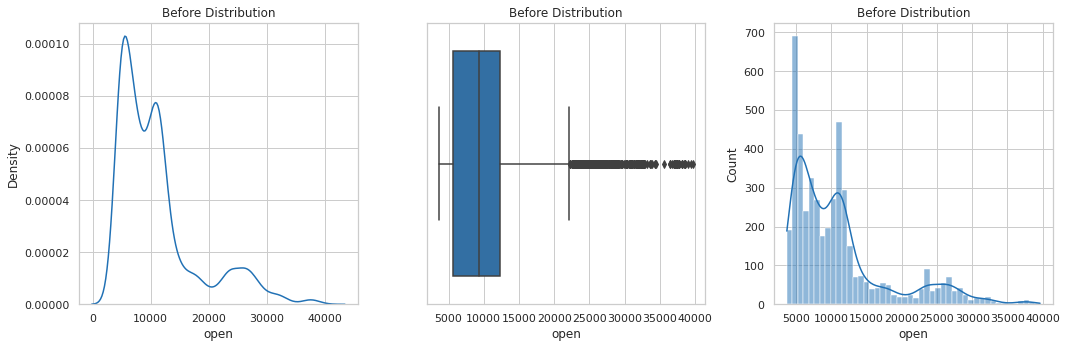

In [67]:
Distribution2(columne='open',data=data,i=0)

In [68]:
############################################################################################################

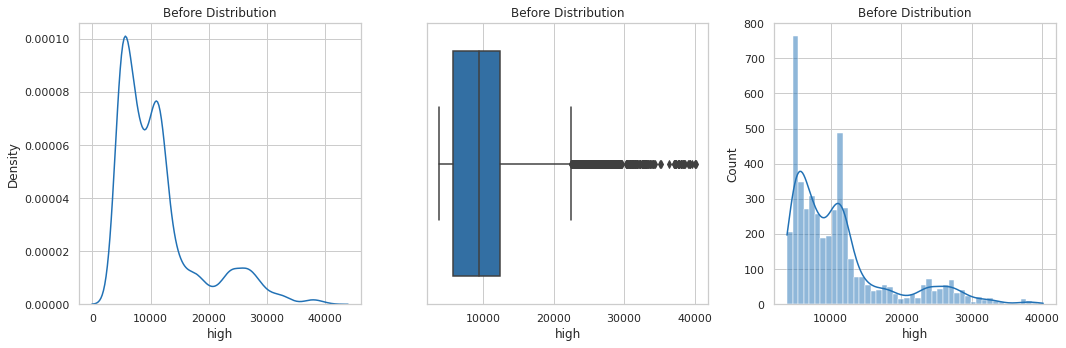

In [69]:
Distribution2(columne='high',data=data,i=0)

In [70]:
############################################################################################################

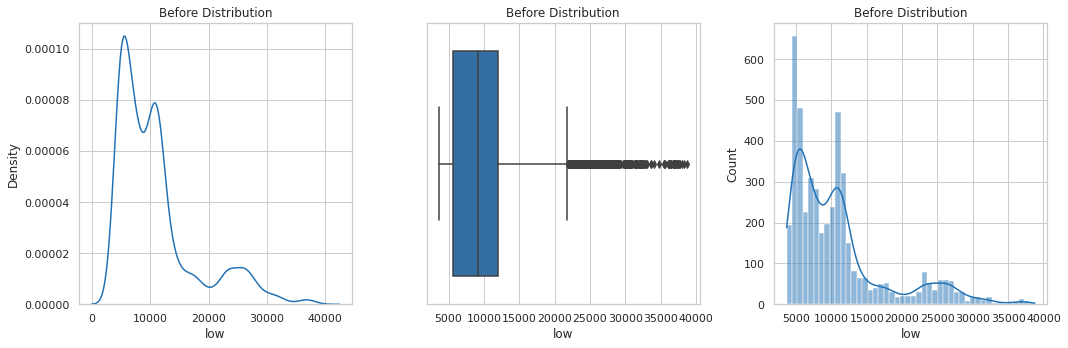

In [71]:
Distribution2(columne='low',data=data,i=0)

In [72]:
############################################################################################################

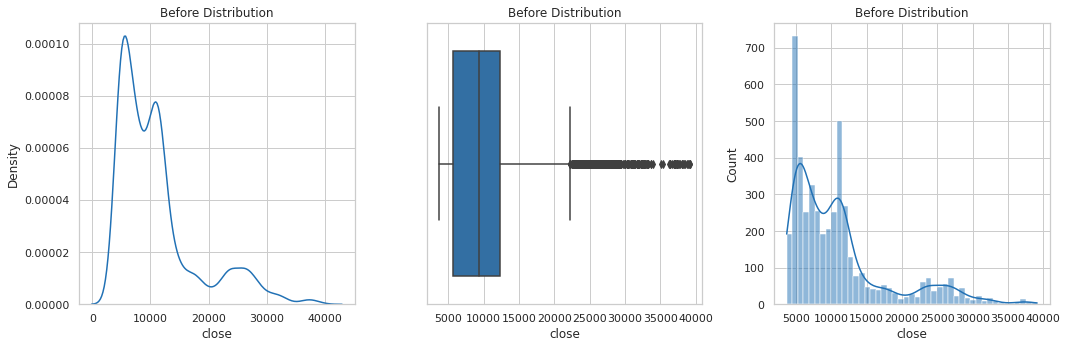

In [73]:
Distribution2(columne='close',data=data,i=0)

In [74]:
############################################################################################################

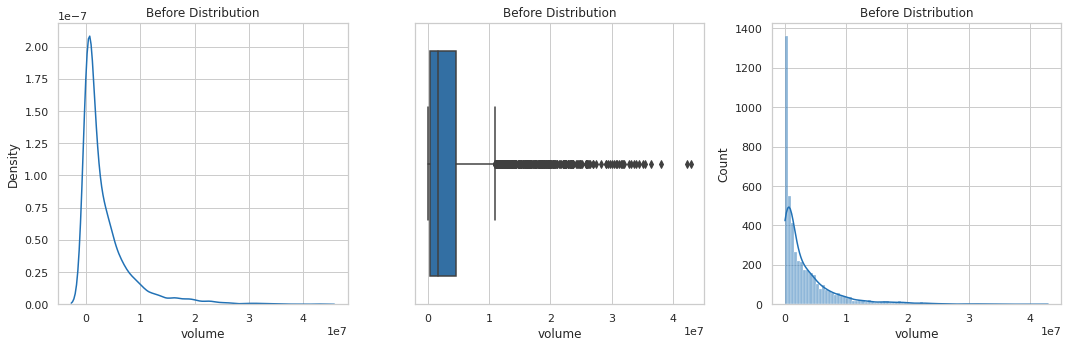

In [75]:
Distribution2(columne='volume',data=data,i=0)

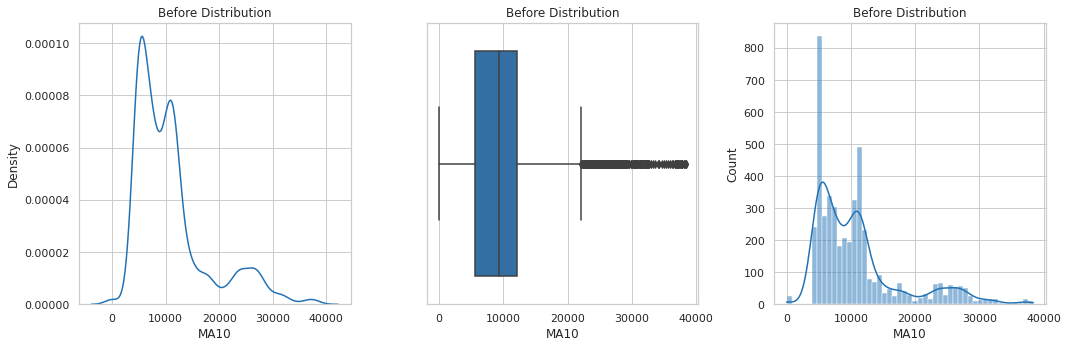

In [76]:
Distribution2(columne='MA10',data=data,i=0)

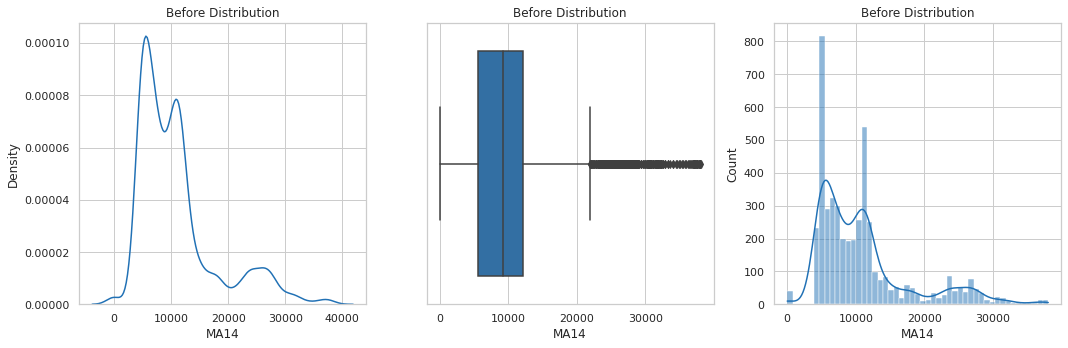

In [77]:
Distribution2(columne='MA14',data=data,i=0)

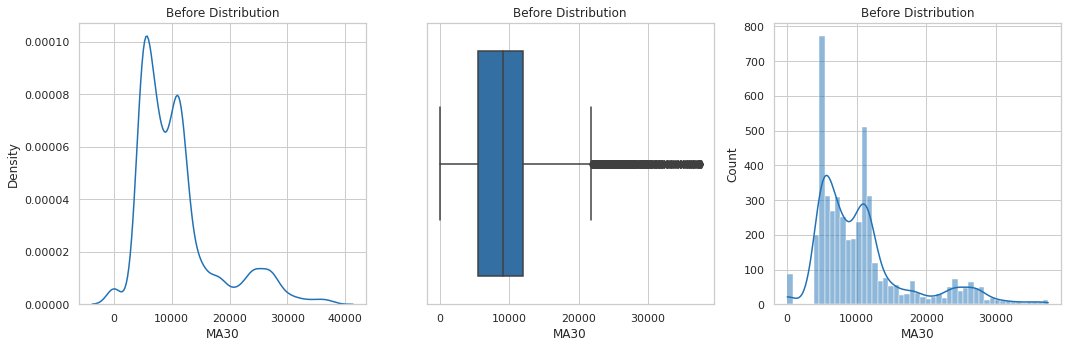

In [78]:
Distribution2(columne='MA30',data=data,i=0)

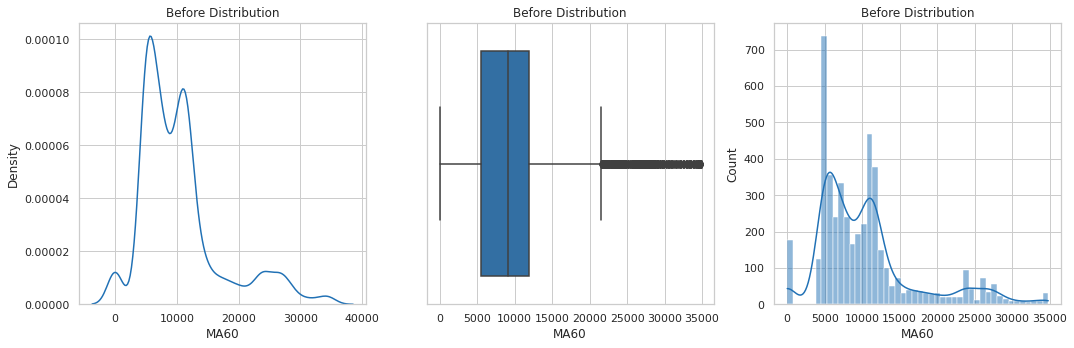

In [79]:
Distribution2(columne='MA60',data=data,i=0)

In [80]:
############################################################################################################

In [81]:
#XÁC ĐỊNH CÁC CỘT CÓ DỮ LIỆU BỊ MISSING
print(columns_with_missing_values(data))

missing_columns=(data.isnull().sum())
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_object_columns=list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)

print(data.shape)
print(missing_columns)
print(miss_num_columns)
print(miss_object_columns)

Series([], dtype: int64)
(4738, 15)
open           0
high           0
low            0
close          0
volume         0
tradingDate    0
MA10           0
MA14           0
MA30           0
MA60           0
date           0
month          0
year           0
quarter_y      0
ticket         0
dtype: int64
[]
[]


In [82]:
data.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
open,4738.000000,11036.585268,6944.658930,3687.000000,5658.000000,9286.000000,12253.000000,39628.000000
high,4738.000000,11190.070494,7047.343135,3785.000000,5724.000000,9394.000000,12401.000000,40157.000000
low,4738.000000,10887.196074,6827.415885,3662.000000,5582.000000,9193.500000,12067.000000,38782.000000
close,4738.000000,11041.347193,6944.527328,3700.000000,5661.000000,9286.000000,12280.750000,39152.000000
volume,4738.000000,3498608.121148,4940417.543685,0.000000,366599.000000,1568436.000000,4585655.000000,43004800.000000
MA10,4738.000000,10950.039932,6913.471271,0.000000,5629.700000,9264.200000,12216.150000,38403.700000
MA14,4738.000000,10909.922903,6900.555877,0.000000,5614.285714,9248.321429,12140.089286,38065.571429
MA30,4738.000000,10749.266737,6847.753025,0.000000,5558.650000,9148.566667,12029.233333,37582.533333
MA60,4738.000000,10452.718816,6745.575904,0.000000,5476.666667,9067.441667,11893.579167,34817.366667
date,4738.000000,15.873786,8.676297,1.000000,8.000000,16.000000,23.000000,31.000000


In [83]:
data.to_csv('PrepareData_V3.csv', index=None)